In [1]:
!nvidia-smi

Mon Aug 22 18:10:37 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   55C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

**Install required Libraries**

In [2]:
!pip install tensorflow-gpu==1.15.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 410.9 MB 34 kB/s 
     |████████████████████████████████| 50 kB 6.7 MB/s 
     |████████████████████████████████| 503 kB 65.4 MB/s 
     |████████████████████████████████| 3.8 MB 42.4 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=c25ec7622a0047ab3c29197479f477a7b4c69486791550ae27a7f565d77a668d
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting un

In [3]:
!pip install keras==2.3.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 377 kB 4.8 MB/s 
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.2+zzzcolab20220719082949 requires keras<2.9,>=2.8.0rc0, but you have keras 2.3.1 which is incompatible.
tensorflow 2.8.2+zzzcolab20220719082949 requires tensorboard<2.9,>=2.8, but you have tensorboard 1.15.0 which is incompatible.
tensorflow 2.8.2+zzzcolab20220719082949 requires tensorflow-estimator<2.9,>=2.8, but you have tensorflow-estimator 1.15.1 which is incompatible.


In [4]:
import keras

Using TensorFlow backend.


In [5]:
import tensorflow as tf
tf.version.VERSION

'1.15.2'

In [6]:
!pip install --upgrade h5py==2.10.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.9 MB 4.9 MB/s 
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.2+zzzcolab20220719082949 requires keras<2.9,>=2.8.0rc0, but you have keras 2.3.1 which is incompatible.
tensorflow 2.8.2+zzzcolab20220719082949 requires tensorboard<2.9,>=2.8, but you have tensorboard 1.15.0 which is incompatible.
tensorflow 2.8.2+zzzcolab20220719082949 requires tensorflow-estimator<2.9,>=2.8, but you have tensorflow-estimator 1.15.1 which is incompatible.


In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
import sys
sys.path.append("/content/drive/MyDrive/BSEF19A032_A3/")

In [15]:
cd /content/drive/MyDrive/BSEF19A032_A3/

/content/drive/MyDrive/BSEF19A032_A3


In [5]:
!ls

annotations.json  Dataset.rar  Mask_RCNN_custom_datasetTraining.ipynb


In [6]:
!git clone https://github.com/AdeelaIslam/Mask_RCNN.git

Cloning into 'Mask_RCNN'...
remote: Enumerating objects: 1059, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 1059 (delta 2), reused 6 (delta 2), pack-reused 1051
Receiving objects: 100% (1059/1059), 137.74 MiB | 18.07 MiB/s, done.
Resolving deltas: 100% (614/614), done.
Checking out files: 100% (78/78), done.


In [16]:
sys.path.append("/content/drive/MyDrive/BSEF19A032_A3/Mask_RCNN/demo")

In [17]:
from train_mask_rcnn_demo import *
%matplotlib inline

**Load Datset**

In [18]:
# Extract Images
images_path = "Dataset.zip"
annotations_path = "annotations.json"

extract_images(images_path, "/Dataset")

Extracted: 36 images


In [19]:
dataset_train = load_image_dataset(annotations_path, "/Dataset", "train")
dataset_val = load_image_dataset(annotations_path, "/Dataset", "val")
class_number = dataset_train.count_classes()
print('Train: %d' % len(dataset_train.image_ids))
print('Validation: %d' % len(dataset_val.image_ids))
print("Classes: {}".format(class_number))

Annotation json path:  annotations.json
Annotation json path:  annotations.json
Train: 32
Validation: 4
Classes: 2


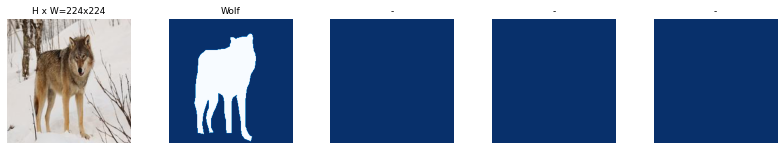

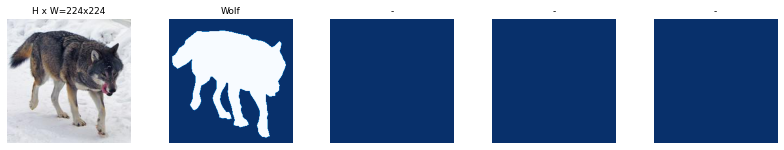

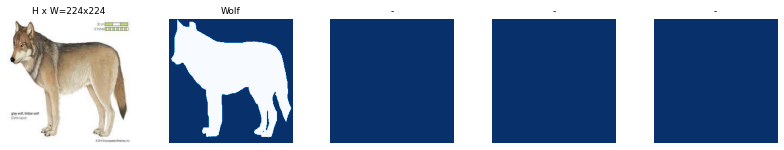

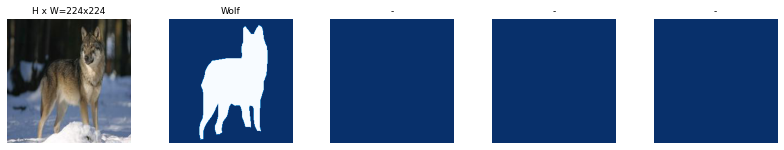

In [20]:
# Load image samples
display_image_samples(dataset_train)

**Train Mask_RCNN**

In [21]:
# Load Configuration
config = CustomConfig(class_number)
#config.display()
model = load_training_model(config)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
box_ind is deprecated, use box_indices instead


/content/drive/MyDrive/BSEF19A032_A3/Mask_RCNN/mask_rcnn_coco.h5


In [22]:
# Start Training
# This operation might take a long time.
train_head(model, dataset_train, dataset_train, config)


Starting at epoch 0. LR=0.001

Checkpoint Path: /content/drive/MyDrive/BSEF19A032_A3/Mask_RCNN/logs/object20220822T1825/mask_rcnn_object_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
In model:  rpn_model
    rpn_conv_shared        (Conv2D)
    rpn_class_raw          (Conv2D)
    rpn_bbox_pred          (Conv2D)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mrcnn_mask_conv4       (Ti

Epoch 1/5
500/500 [==============================] - 469s 938ms/step - loss: 0.3054 - val_loss: 0.1513


Epoch 2/5
500/500 [==============================] - 447s 894ms/step - loss: 0.1139 - val_loss: 0.0961
Epoch 3/5
500/500 [==============================] - 447s 894ms/step - loss: 0.0850 - val_loss: 0.0872
Epoch 4/5
500/500 [==============================] - 446s 892ms/step - loss: 0.0734 - val_loss: 0.0685
Epoch 5/5
500/500 [==============================] - 447s 893ms/step - loss: 0.0637 - val_loss: 0.0577


**Testing**

In [23]:
# Load Test Model
# The latest trained model will be loaded
test_model, inference_config = load_test_model(class_number)



Instructions for updating:
Use `tf.cast` instead.


Loading weights from  /content/drive/MyDrive/BSEF19A032_A3/Mask_RCNN/logs/object20220822T1825/mask_rcnn_object_0005.h5
Re-starting from epoch 5


original_image           shape: (512, 512, 3)         min:    0.00000  max:  255.00000  uint8
Trained model result
Processing 1 images
image                    shape: (512, 512, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 512, 512, 3)      min: -115.80000  max:  151.10000  float64
image_metas              shape: (1, 15)               min:    0.00000  max:  512.00000  int64
anchors                  shape: (1, 65472, 4)         min:   -0.70849  max:    1.58325  float32
Annotation


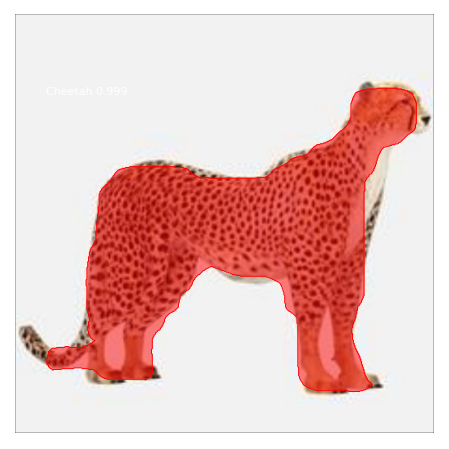

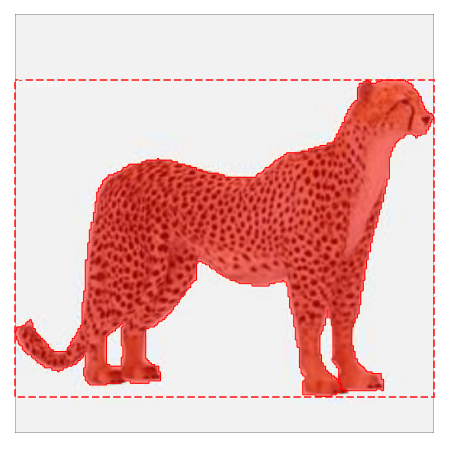

In [24]:
# Test on a random image
test_random_image(test_model, dataset_val, inference_config)

## Testing on Previously saved (pre-trained) Model

In [25]:
from mrcnn.visualize import random_colors, get_mask_contours, draw_mask
from google.colab.patches import cv2_imshow

In [27]:
# Load Image
img = cv2.imread("/content/cheetah.png")

checkpoint_path = '/content/drive/MyDrive/BSEF19A032_A3/Mask_RCNN/logs/object20220822T1825/mask_rcnn_object_0005.h5'
test_model, inference_config = load_inference_model(num_classes=2, model_path=checkpoint_path)
image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Detect results
r = test_model.detect([image])[0]

Loading weights from  /content/drive/MyDrive/BSEF19A032_A3/Mask_RCNN/logs/object20220822T1825/mask_rcnn_object_0005.h5
Re-starting from epoch 5


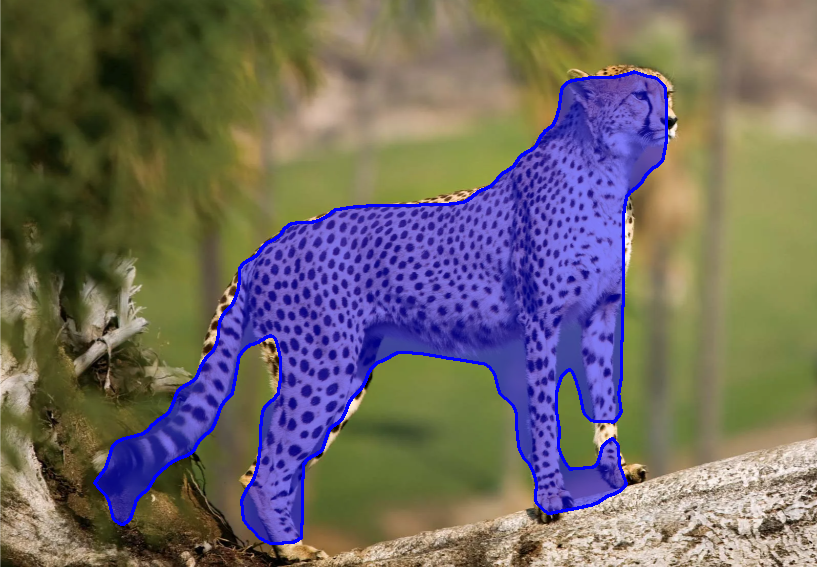

In [28]:
# Get Coordinates and show it on the image
object_count = len(r["class_ids"])
colors = random_colors(object_count)
for i in range(object_count):
    # 1. Mask
    mask = r["masks"][:, :, i]
    contours = get_mask_contours(mask)
    for cnt in contours:
        cv2.polylines(img, [cnt], True, colors[i], 2)
        img = draw_mask(img, [cnt], colors[i])

cv2_imshow(img)

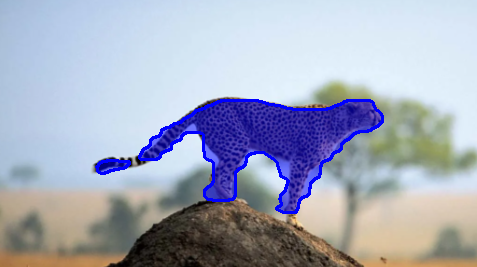

In [30]:
# Load Image
img = cv2.imread("/content/cheetah2.png")
image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
r = test_model.detect([image])[0]
object_count = len(r["class_ids"])
colors = random_colors(object_count)
for i in range(object_count):
    # 1. Mask
    mask = r["masks"][:, :, i]
    contours = get_mask_contours(mask)
    for cnt in contours:
        cv2.polylines(img, [cnt], True, colors[i], 2)
        img = draw_mask(img, [cnt], colors[i])
cv2_imshow(img)

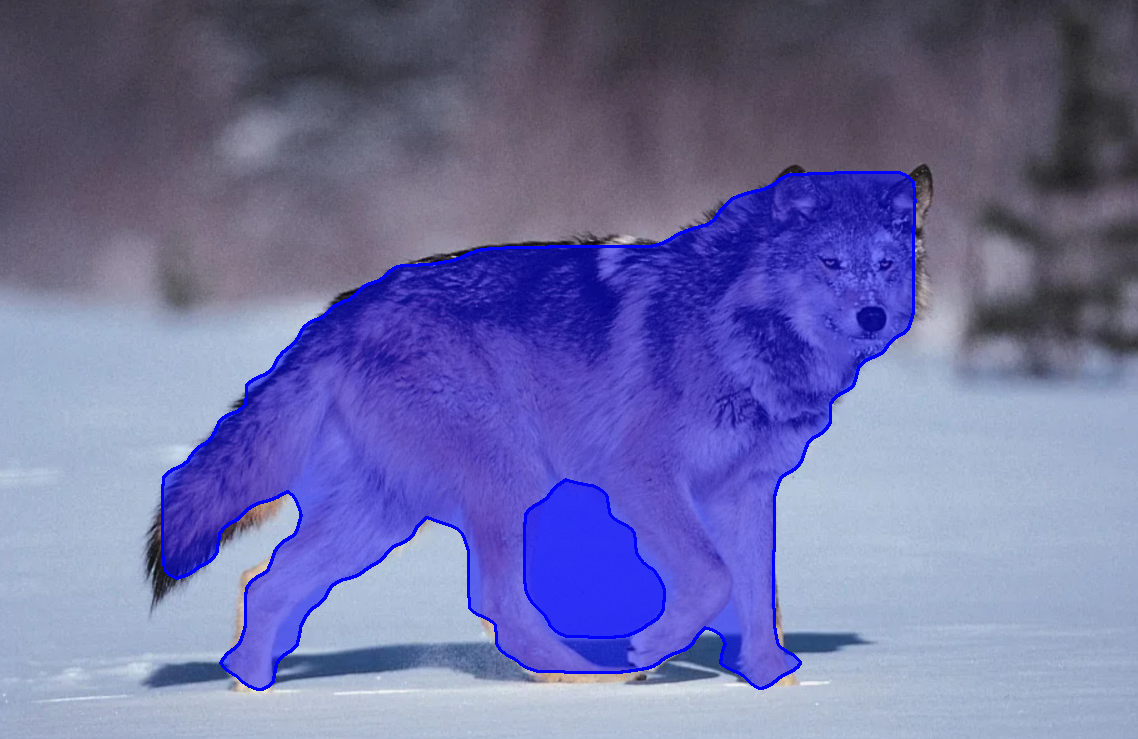

In [31]:
# Load Image
img = cv2.imread("/content/wolf.png")
image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
r = test_model.detect([image])[0]
object_count = len(r["class_ids"])
colors = random_colors(object_count)
for i in range(object_count):
    # 1. Mask
    mask = r["masks"][:, :, i]
    contours = get_mask_contours(mask)
    for cnt in contours:
        cv2.polylines(img, [cnt], True, colors[i], 2)
        img = draw_mask(img, [cnt], colors[i])
cv2_imshow(img)